# Word Embeddings

Word embedding is a mapping of a word to a d-dimensional vector space.
This real valued vector representation captures semantic and syntactic features.
Polyglot offers a simple interface to load several formats of word embeddings.

In [1]:
from polyglot.mapping import Embedding

## Formats

The Embedding class can read word embeddings from different sources:

- Gensim word2vec objects: (`from_gensim` method)
- Word2vec binary/text models: (`from_word2vec` method)
- polyglot pickle files: (`load` method)

In [2]:
embeddings = Embedding.load("/home/rmyeid/polyglot_data/embeddings2/en/embeddings_pkl.tar.bz2")

##Nearest Neighbors

A common way to investigate the space capture by the embeddings is to query for the nearest neightbors of any word.

In [3]:
neighbors = embeddings.nearest_neighbors("green")
neighbors

[u'blue',
 u'white',
 u'red',
 u'yellow',
 u'black',
 u'grey',
 u'purple',
 u'pink',
 u'light',
 u'gray']

to calculate the distance between a word and the nieghbors, we can call the `distances` method

In [4]:
embeddings.distances("green", neighbors)

array([ 1.34894466,  1.37864077,  1.39504588,  1.39524949,  1.43183875,
        1.68007386,  1.75897062,  1.88401115,  1.89186132,  1.902614  ], dtype=float32)

The word embeddings are not unit vectors, actually the more frequent the word is the larger the norm of its own vector.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

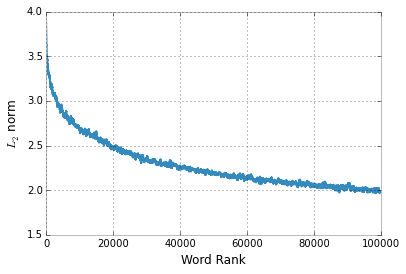

In [6]:
norms = np.linalg.norm(embeddings.vectors, axis=1)
window = 300
smooth_line = np.convolve(norms, np.ones(window)/float(window), mode='valid')
plt.plot(smooth_line)
plt.xlabel("Word Rank"); _ = plt.ylabel("$L_2$ norm")

This could be problematic for some applications and training algorithms.
We can normalize them by $L_2$ norms to get unit vectors to reduce effects of word frequency, as the following

In [7]:
embeddings = embeddings.normalize_words()

In [8]:
neighbors = embeddings.nearest_neighbors("green")
for w,d in zip(neighbors, embeddings.distances("green", neighbors)):
  print("{:<8}{:.4f}".format(w,d))

white   0.4261
blue    0.4451
black   0.4591
red     0.4786
yellow  0.4947
grey    0.6072
purple  0.6392
light   0.6483
pink    0.6574
colour  0.6824


## Vocabulary Expansion

In [16]:
from polyglot.mapping import CaseExpander, DigitExpander

Not all the words are available in the dictionary defined by the word embeddings.
Sometimes it would be useful to map new words to similar ones that we have embeddings for.

### Case Expansion
For example, the word `GREEN` is not available in the embeddings,

In [9]:
"GREEN" in embeddings

False

we would like to return the vector that represents the word `Green`, to do that we apply a case expansion:

In [12]:
embeddings.apply_expansion(CaseExpander)

In [13]:
"GREEN" in embeddings

True

In [15]:
embeddings.nearest_neighbors("GREEN")

[u'White',
 u'Black',
 u'Brown',
 u'Blue',
 u'Diamond',
 u'Wood',
 u'Young',
 u'Hudson',
 u'Cook',
 u'Gold']

### Digit Expansion

We reduce the size of the vocabulary while training the embeddings by grouping special classes of words.
Once common case of such grouping is digits.
Every digit in the training corpus get replaced by the symbol `#`.
For example, a number like `123.54` becomes `###.##`.
Therefore, querying the embedding for a new number like `434` will result in a failure

In [19]:
"434" in embeddings

False

To fix that, we apply another type of vocabulary expansion `DigitExpander`.
It will map any number to a sequence of `#`s.

In [20]:
embeddings.apply_expansion(DigitExpander)

In [21]:
"434" in embeddings

True

As expected, the neighbors of the new number `434` will be other numbers:

In [28]:
embeddings.nearest_neighbors("434")

[u'##',
 u'#',
 u'3',
 u'#####',
 u'#,###',
 u'##,###',
 u'##EN##',
 u'####',
 u'###EN###',
 u'n']

## Demo

Demo is available [here](https://bit.ly/embeddings).

### Citation

This work is a direct implementation of the research being described in the [Polyglot: Distributed Word Representations for Multilingual NLP](http://www.aclweb.org/anthology/W13-3520) paper.
The author of this library strongly encourage you to cite the following paper if you are using this software.

```
@InProceedings{polyglot:2013:ACL-CoNLL,
 author    = {Al-Rfou, Rami  and  Perozzi, Bryan  and  Skiena, Steven},
 title     = {Polyglot: Distributed Word Representations for Multilingual NLP},
 booktitle = {Proceedings of the Seventeenth Conference on Computational Natural Language Learning},
 month     = {August},
 year      = {2013},
 address   = {Sofia, Bulgaria},
 publisher = {Association for Computational Linguistics},
 pages     = {183--192}, 
 url       = {http://www.aclweb.org/anthology/W13-3520}
}
```

## References

- 
- 